In [2]:
import pandas as pd
import networkx as nx

In [4]:
df=pd.read_excel('HH_EMT_model_supplementary_tables.xlsx', sheet_name='ST2 - interactions')

In [5]:
G=nx.DiGraph()
G.add_edges_from(zip(df['source node name in model'], df['target node name in model']))
print(G.number_of_edges(),G.number_of_nodes())

51 24


In [6]:
negative_edges = list(zip(df[df['sign']==-1]['source node name in model'],df[df['sign']==-1]['target node name in model']))
positive_edges = list(zip(df[df['sign']==1]['source node name in model'],df[df['sign']==1]['target node name in model']))

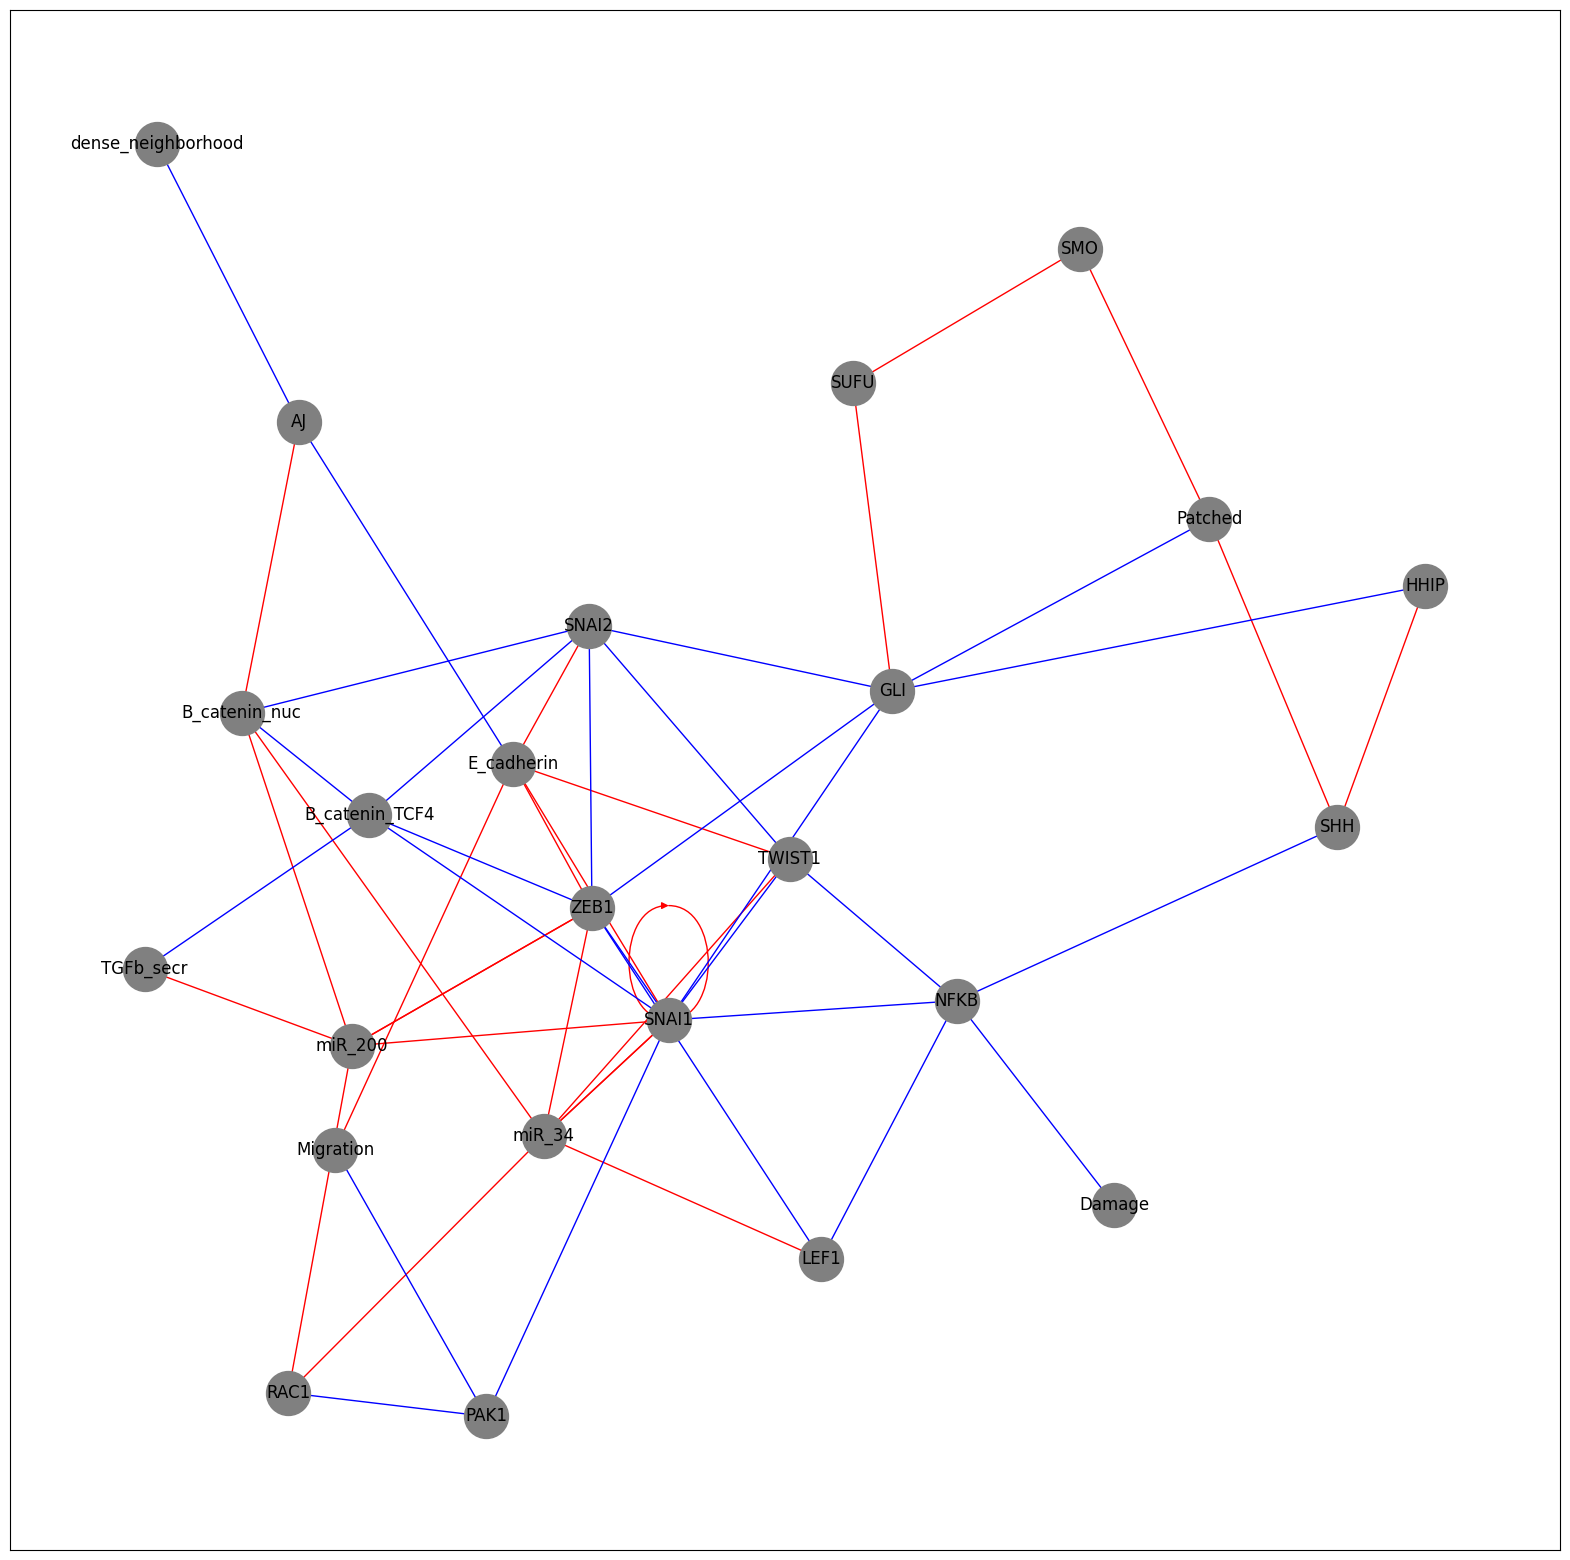

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'grey', node_size = 1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist = negative_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist = positive_edges, edge_color='b', arrows=True)

#nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()


In [14]:
for n in G.nodes():
    G.nodes[n]['label']=n
nx.write_graphml(G,'figures/Figure1_raw.graphml')